# Rarefaction

### Carlos J. Melian
#### U. Bern, Nov 6 2020 

# Questions 


## How to compare samples of different size?

## How would you account for time, space, and heterogeneity in the sampling design (or in the analysis)?

# In Ecology

## How to compare species richness among sets with different sample size instead of comparing absolute number of species

### Sanders, Howard L. "Marine Benthic Diversity: A Comparative Study". (1968). The American Naturalist. 102 (925): 243. doi:10.1086/282541


### Example Tandilia Hills System --- Argentinian Pampa
### Same sampling effort across islands of different size: 
#### Do larger islands have more diversity?

![title](Pictures/pg_0002.png)

# Tandilia Hills System --- Argentinian Pampa

![title](Pictures/pg_0003.png)

![title](Pictures/pg_0009.png)

In [1]:
pkg load statistics
pkg load dataframe
pkg load symbolic

%DATA ---------------------
fid = fopen('Code/Octave/plantpollinator/Matrix complete_2020.csv');
in = fscanf(fid,'%c');
fclose(fid);
linesR = regexp(in,'(^,|)([^\n]+)', 'match');
All = char(linesR);
Forest = cell(length(All),1);
wR = unique_no_sort(linesR);


%1. Print raw data ----------------------------
R = char(wR)
%----------------------------


R =

Sierra,Day,Plant+AF8-species,Number+AF8-of+AF8-flowers,Insect+AF8-species,Insect+AF8-abundance,Plant+AF8-ID, , , , , 
Difuntito,08/03/08,Abutilion terminale,10,Toxomerus sp,1,2,,,,,                                                      
Difuntito,01/12/07,Abutilion terminale,2,No visit,0,1,,,,,                                                           
Difuntito,01/12/07,Abutilion terminale,5,No visit,0,2,,,,,                                                           
Difuntito,08/03/08,Abutilion terminale,1,No visit,0,1,,,,,                                                           
La Paja,11/12/07,Abutilion terminale,2,No visit,0,1,,,,,                                                             
La Paja,04/02/08,Abutilion terminale,5,No visit,0,1,,,,,                                                             
Cinco cerros,18/3/08,Abutilion terminale,2,No visit,0,1,,,,,                                                         
Difuntito,08/03/08,Abutilion terminale,10,Gaessisch

Difuntos,20/3/08,Achyrocline satureoides,750,Podagritus sp,1,2,,,,,                                                  
Barrosa,10/03/08,Achyrocline satureoides,1500,Platycheirus sp,1,2,,,,,                                               
Difuntos,20/3/08,Achyrocline satureoides,2500,Platycheirus sp,1,6,,,,,                                               
La Chata,16/3/08,Achyrocline satureoides,2500,Pepsis sp,1,8,,,,,                                                     
Amarante,30/3/08,Achyrocline satureoides,600,Parachytas sp,1,2,,,,,                                                  
Difuntos,09/03/08,Achyrocline satureoides,1750,Parachytas sp,2,7,,,,,                                                
Difuntos,20/3/08,Achyrocline satureoides,1500,Parachytas sp,2,5,,,,,                                                 
Difuntos,20/3/08,Achyrocline satureoides,1500,Parachytas sp,5,3,,,,,                                                 
La Chata,16/3/08,Achyrocline satureoides,1250,Parachytas

El Morro,15/2/08,Achyrocline satureoides,1500,Chilicola sp,1,1,,,,,                                                  
La Brava,05/04/08,Achyrocline satureoides,500,Chilicola sp,1,3,,,,,                                                  
La Chata,07/12/07,Achyrocline satureoides,10,Chilicola sp,1,2,,,,,                                                   
La Chata,25/2/08,Achyrocline satureoides,500,Chilicola sp,1,3,,,,,                                                   
La Chata,25/2/08,Achyrocline satureoides,1500,Chilicola sp,1,7,,,,,                                                  
La Chata,25/2/08,Achyrocline satureoides,1500,Chilicola sp,1,8,,,,,                                                  
La Chata,16/3/08,Achyrocline satureoides,750,Chilicola sp,1,2,,,,,                                                   
La Chata,16/3/08,Achyrocline satureoides,2500,Chilicola sp,2,8,,,,,                                                  
La Chata,30/3/08,Achyrocline satureoides,750,Chilicola s

Volcan,24/3/08,Achyrocline satureoides,1250,Augochlora semiramis,5,4,,,,,                                            
Volcan,24/3/08,Achyrocline satureoides,1250,Augochlora semiramis,10,6,,,,,                                           
La Paja,17/3/08,Achyrocline satureoides,250,Audre epulus signata,1,3,,,,,                                            
Amarante,16/3/08,Achyrocline satureoides,200,Apis mellifera,1,1,,,,,                                                 
Amarante,30/3/08,Achyrocline satureoides,600,Apis mellifera,3,2,,,,,                                                 
Barrosa,10/03/08,Achyrocline satureoides,750,Apis mellifera,1,3,,,,,                                                 
Barrosa,10/03/08,Achyrocline satureoides,1500,Apis mellifera,2,2,,,,,                                                
Difuntos,09/03/08,Achyrocline satureoides,4000,Apis mellifera,1,8,,,,,                                               
Difuntos,20/3/08,Achyrocline satureoides,500,Apis mellif

Vigilancia,18/10/07,Baccharis articulata,2000,Toxomerus sp,5,1,,,,,                                                  
Vigilancia,30/10/07,Baccharis articulata,600,Toxomerus sp,2,1,,,,,                                                   
Vigilancia,30/10/07,Baccharis articulata,2000,Toxomerus sp,3,3,,,,,                                                  
Volcan,17/11/07,Baccharis articulata,1000,Toxomerus sp,10,1,,,,,                                                     
La Brava,21/11/07,Baccharis articulata,1000,Staphilinidae sp1,2,3,,,,,                                               
Amarante,27/11/07,Baccharis articulata,1000,Sarcophagidae,1,1,,,,,                                                   
Barrosa,29/10/07,Baccharis articulata,3000,Sarcophagidae,1,1,,,,,                                                    
Cinco cerros,22/10/07,Baccharis articulata,1000,Sarcophagidae,6,3,,,,,                                               
Cinco cerros,22/10/07,Baccharis articulata,2000,Sarcopha

Volcan,11/02/08,Baccharis coridifolia,2000,Polybia scutellaris,2,2,,,,,                                              
Difuntito,17/2/08,Baccharis coridifolia,500,Polistes sp,1,1,,,,,                                                     
La Brava,18/2/08,Baccharis coridifolia,2000,Polistes sp,2,3,,,,,                                                     
Volcan,11/02/08,Baccharis coridifolia,1000,Polistes sp,2,1,,,,,                                                      
Barrosa,22/2/08,Baccharis coridifolia,300,No visit,0,1,,,,,                                                          
Difuntos,16/2/08,Baccharis coridifolia,500,No visit,0,1,,,,,                                                         
El Morro,15/2/08,Baccharis coridifolia,2000,No visit,0,5,,,,,                                                        
Amarante,12/02/08,Baccharis coridifolia,500,Mischocyttarus drewseni,1,1,,,,,                                         
La Brava,18/2/08,Baccharis coridifolia,2000,Mischocyttar

La Brava,13/3/08,Baccharis tandilensis,600,Mischocyttarus drewseni,1,6,,,,,                                          
La Chata,16/3/08,Baccharis tandilensis,200,Mischocyttarus drewseni,2,2,,,,,                                          
Vigilancia,29/3/08,Baccharis tandilensis,1000,Mischocyttarus drewseni,1,1,,,,,                                       
Volcan,23/2/08,Baccharis tandilensis,1000,Mischocyttarus drewseni,1,1,,,,,                                           
Volcan,12/03/08,Baccharis tandilensis,100,Mischocyttarus drewseni,1,2,,,,,                                           
Barrosa,22/2/08,Baccharis tandilensis,100,Melyridae,1,1,,,,,                                                         
Barrosa,22/2/08,Baccharis tandilensis,100,Melyridae,4,3,,,,,                                                         
Barrosa,22/2/08,Baccharis tandilensis,600,Melyridae,1,4,,,,,                                                         
Barrosa,10/03/08,Baccharis tandilensis,100,Melissoptila 

Piedra Alta,11/12/07,Blumenbachia insignis,250,Astylus quadrilineatus,6,2,,,,,                                       
Difuntito,23/10/07,Blumenbachia insignis,50,Allograpta sp,3,2,,,,,                                                   
La Paja,28/9/07,Brassica rapa,10,No visit,0,1,,,,,                                                                   
La Paja,28/9/07,Brassica rapa,20,No visit,0,2,,,,,                                                                   
Difuntos,26/4/08,Canna glauca,15,Xylocopa ciliata,2,1,,,,,                                                           
Difuntos,30/11/07,Canna glauca,4,No visit,0,1,,,,,                                                                   
Difuntos,02/04/08,Canna glauca,2,No visit,0,2,,,,,                                                                   
Difuntos,02/04/08,Canna glauca,2,Augochlorella ephyra,2,1,,,,,                                                       
Difuntos,26/4/08,Canna glauca,15,Agraulis vanillae,3,1,,

Volcan,24/3/08,Colletia paradoxa,4000,Polybia scutellaris,1,5,,,,,                                                   
La Chata,16/3/08,Colletia paradoxa,2500,Polistes sp,1,3,,,,,                                                         
La Chata,30/3/08,Colletia paradoxa,100,Polistes sp,1,1,,,,,                                                          
La Chata,30/3/08,Colletia paradoxa,2000,Polistes sp,1,2,,,,,                                                         
La Chata,30/3/08,Colletia paradoxa,5000,Polistes sp,1,5,,,,,                                                         
La Chata,30/3/08,Colletia paradoxa,6000,Polistes sp,2,6,,,,,                                                         
Vigilancia,06/02/08,Colletia paradoxa,300,Polistes sp,1,1,,,,,                                                       
Vigilancia,29/3/08,Colletia paradoxa,5000,Polistes sp,10,2,,,,,                                                      
Volcan,24/3/08,Colletia paradoxa,1500,Polistes sp,1,3,,,

Vigilancia,21/11/07,Crysanthemum leucanthemum,80,Toxomerus sp,1,4,,,,,                                               
Vigilancia,21/11/07,Crysanthemum leucanthemum,100,Toxomerus sp,2,6,,,,,                                              
Vigilancia,05/12/07,Crysanthemum leucanthemum,10,Toxomerus sp,1,4,,,,,                                               
Vigilancia,05/12/07,Crysanthemum leucanthemum,20,Toxomerus sp,1,5,,,,,                                               
Vigilancia,05/12/07,Crysanthemum leucanthemum,50,Toxomerus sp,1,7,,,,,                                               
Vigilancia,05/12/07,Crysanthemum leucanthemum,50,Toxomerus sp,1,8,,,,,                                               
Vigilancia,05/12/07,Crysanthemum leucanthemum,50,Toxomerus sp,2,9,,,,,                                               
Vigilancia,05/12/07,Crysanthemum leucanthemum,20,Tabanidae,1,5,,,,,                                                  
Vigilancia,30/10/07,Crysanthemum leucanthemum,40,Syritta

Difuntito,13/12/07,Echium plantagineum,360,Astylus quadrilineatus,12,1,,,,,                                          
Piedra Alta,01/11/07,Echium plantagineum,200,Astylus quadrilineatus,1,5,,,,,                                         
Difuntito,08/11/07,Echium plantagineum,100,Apis mellifera,5,2,,,,,                                                   
Difuntito,01/12/07,Echium plantagineum,320,Apis mellifera,20,1,,,,,                                                  
Difuntito,13/12/07,Echium plantagineum,360,Apis mellifera,10,1,,,,,                                                  
La Paja,26/11/07,Echium plantagineum,30,Apis mellifera,1,1,,,,,                                                      
Piedra Alta,01/11/07,Echium plantagineum,4,Apis mellifera,1,1,,,,,                                                   
Piedra Alta,20/11/07,Echium plantagineum,120,Apis mellifera,100,2,,,,,                                               
Piedra Alta,20/11/07,Echium plantagineum,120,Apis mellif

Volcan,05/01/08,Eryngium horridum,50,Mordellidae sp1,1,1,,,,,                                                        
La Brava,14/1/08,Eryngium horridum,100,Megacyllene spixi,1,1,,,,,                                                    
La Chata,21/1/08,Eryngium horridum,250,Megacyllene insignita,1,1,,,,,                                                
La Chata,21/1/08,Eryngium horridum,550,Megacyllene insignita,1,2,,,,,                                                
Vigilancia,17/12/07,Eryngium horridum,50,Megacyllene insignita,1,1,,,,,                                              
Difuntito,25/1/08,Eryngium horridum,300,Megachile sp1,1,3,,,,,                                                       
Amarante,21/1/08,Eryngium horridum,17,Lucilia sericata,1,1,,,,,                                                      
Cinco cerros,25/1/08,Eryngium horridum,450,Lucilia sericata,2,1,,,,,                                                 
Difuntito,25/1/08,Eryngium horridum,300,Lucilia sericata

Barrosa,06/12/07,Eryngium regnellii,800,Toxomerus sp,4,1,,,,,                                                        
Barrosa,06/12/07,Eryngium regnellii,300,Toxomerus sp,1,5,,,,,                                                        
Barrosa,21/12/07,Eryngium regnellii,800,Toxomerus sp,4,3,,,,,                                                        
Barrosa,21/12/07,Eryngium regnellii,900,Toxomerus sp,2,1,,,,,                                                        
Barrosa,21/12/07,Eryngium regnellii,1000,Toxomerus sp,1,9,,,,,                                                       
Cinco cerros,13/12/07,Eryngium regnellii,800,Toxomerus sp,1,6,,,,,                                                   
Difuntos,29/10/07,Eryngium regnellii,500,Toxomerus sp,2,2,,,,,                                                       
Difuntos,15/11/07,Eryngium regnellii,100,Toxomerus sp,1,2,,,,,                                                       
Difuntos,30/11/07,Eryngium regnellii,400,Toxomerus sp,10

Barrosa,06/12/07,Eryngium regnellii,300,Polybia scutellaris,1,5,,,,,                                                 
Barrosa,21/12/07,Eryngium regnellii,800,Polybia scutellaris,1,3,,,,,                                                 
Barrosa,21/12/07,Eryngium regnellii,900,Polybia scutellaris,1,1,,,,,                                                 
Barrosa,21/12/07,Eryngium regnellii,1000,Polybia scutellaris,1,5,,,,,                                                
Cinco cerros,13/12/07,Eryngium regnellii,300,Polybia scutellaris,1,2,,,,,                                            
Cinco cerros,13/12/07,Eryngium regnellii,800,Polybia scutellaris,2,6,,,,,                                            
Cinco cerros,07/01/08,Eryngium regnellii,300,Polybia scutellaris,3,6,,,,,                                            
Cinco cerros,07/01/08,Eryngium regnellii,400,Polybia scutellaris,2,7,,,,,                                            
Difuntito,07/01/08,Eryngium regnellii,300,Polybia scutel

Barrosa,06/12/07,Eryngium regnellii,100,No visit,0,2,,,,,                                                            
Difuntos,16/10/07,Eryngium regnellii,100,No visit,0,1,,,,,                                                           
La Brava,21/11/07,Eryngium regnellii,100,No visit,0,1,,,,,                                                           
La Brava,21/11/07,Eryngium regnellii,100,No visit,0,2,,,,,                                                           
La Chata,06/10/07,Eryngium regnellii,200,No visit,0,1,,,,,                                                           
La Chata,24/10/07,Eryngium regnellii,100,No visit,0,1,,,,,                                                           
La Chata,24/10/07,Eryngium regnellii,100,No visit,0,2,,,,,                                                           
La Chata,24/10/07,Eryngium regnellii,400,No visit,0,3,,,,,                                                           
La Chata,20/11/07,Eryngium regnellii,100,No visit,0,4,,,

La Brava,17/12/07,Eryngium regnellii,700,Drosophilidae,1,6,,,,,                                                      
La Chata,07/12/07,Eryngium regnellii,1500,Drosophilidae,1,3,,,,,                                                     
La Chata,20/12/07,Eryngium regnellii,500,Drosophilidae,1,4,,,,,                                                      
La Chata,20/12/07,Eryngium regnellii,1600,Drosophilidae,1,8,,,,,                                                     
La Paja,11/12/07,Eryngium regnellii,1500,Drosophilidae,3,6,,,,,                                                      
Piedra Alta,04/01/08,Eryngium regnellii,100,Drosophilidae,1,1,,,,,                                                   
Vigilancia,17/12/07,Eryngium regnellii,400,Drosophilidae,1,2,,,,,                                                    
Vigilancia,17/12/07,Eryngium regnellii,600,Drosophilidae,1,5,,,,,                                                    
Vigilancia,14/1/08,Eryngium regnellii,200,Drosophilidae,

Piedra Alta,04/01/08,Eryngium regnellii,500,Cantharidae sp1,3,2,,,,,                                                 
Vigilancia,17/12/07,Eryngium regnellii,400,Cantharidae sp1,2,2,,,,,                                                  
Vigilancia,17/12/07,Eryngium regnellii,500,Cantharidae sp1,1,3,,,,,                                                  
Vigilancia,17/12/07,Eryngium regnellii,600,Cantharidae sp1,1,5,,,,,                                                  
Vigilancia,17/12/07,Eryngium regnellii,600,Cantharidae sp1,4,4,,,,,                                                  
Vigilancia,14/1/08,Eryngium regnellii,200,Cantharidae sp1,5,1,,,,,                                                   
Vigilancia,14/1/08,Eryngium regnellii,300,Cantharidae sp1,1,3,,,,,                                                   
Vigilancia,06/02/08,Eryngium regnellii,300,Cantharidae sp1,10,1,,,,,                                                 
Vigilancia,06/02/08,Eryngium regnellii,500,Cantharidae s

Vigilancia,17/12/07,Eryngium regnellii,600,Augochlora semiramis,1,4,,,,,                                             
Vigilancia,14/1/08,Eryngium regnellii,200,Augochlora semiramis,1,1,,,,,                                              
Vigilancia,14/1/08,Eryngium regnellii,300,Augochlora semiramis,1,3,,,,,                                              
Volcan,03/12/07,Eryngium regnellii,700,Augochlora semiramis,3,5,,,,,                                                 
Volcan,19/12/07,Eryngium regnellii,700,Augochlora semiramis,1,1,,,,,                                                 
Volcan,19/12/07,Eryngium regnellii,1000,Augochlora semiramis,1,4,,,,,                                                
Volcan,05/01/08,Eryngium regnellii,200,Augochlora semiramis,8,4,,,,,                                                 
Volcan,05/01/08,Eryngium regnellii,300,Augochlora semiramis,4,5,,,,,                                                 
Volcan,05/01/08,Eryngium regnellii,300,Augochlora semira

Volcan,03/12/07,Eryngium regnellii,700,Anthomyiidae,3,4,,,,,                                                         
Volcan,03/12/07,Eryngium regnellii,700,Anthomyiidae,5,5,,,,,                                                         
Volcan,03/12/07,Eryngium regnellii,1200,Anthomyiidae,1,6,,,,,                                                        
Volcan,19/12/07,Eryngium regnellii,200,Anthomyiidae,1,6,,,,,                                                         
Volcan,19/12/07,Eryngium regnellii,700,Anthomyiidae,1,2,,,,,                                                         
Volcan,19/12/07,Eryngium regnellii,1000,Anthomyiidae,1,4,,,,,                                                        
Volcan,19/12/07,Eryngium regnellii,1000,Anthomyiidae,2,3,,,,,                                                        
Volcan,05/01/08,Eryngium regnellii,300,Anthomyiidae,1,5,,,,,                                                         
Volcan,05/01/08,Eryngium regnellii,300,Anthomyiidae,2,6,

Difuntos,31/12/07,Eupatorium bupleurifolium,15,Augochloropsis sp2,1,1,,,,,                                           
Vigilancia,17/12/07,Eupatorium bupleurifolium,5000,Augochloropsis erato,1,1,,,,,                                     
Difuntos,12/12/07,Eupatorium bupleurifolium,1000,Augochloropsis erato,1,1,,,,,                                       
Volcan,19/12/07,Eupatorium bupleurifolium,60,Augochlorella ephyra,1,1,,,,,                                           
Volcan,03/12/07,Eupatorium bupleurifolium,75,Augochlora semiramis,1,1,,,,,                                           
Difuntos,12/12/07,Eupatorium bupleurifolium,7000,Astylus quadrilineatus,1,4,,,,,                                     
Cinco cerros,13/12/07,Eupatorium bupleurifolium,500,Apis mellifera,1,1,,,,,                                          
Difuntos,12/12/07,Eupatorium bupleurifolium,3000,Apis mellifera,25,2,,,,,                                            
Difuntos,12/12/07,Eupatorium bupleurifolium,5000,Apis me

Piedra Alta,10/03/08,Eupatorium squarrulosum,40,No visit,0,2,,,,,                                                    
Vigilancia,06/02/08,Eupatorium squarrulosum,10,No visit,0,1,,,,,                                                     
Vigilancia,18/2/08,Eupatorium squarrulosum,41,No visit,0,1,,,,,                                                      
Volcan,23/2/08,Eupatorium squarrulosum,28,No visit,0,1,,,,,                                                          
Volcan,23/2/08,Eupatorium squarrulosum,50,No visit,0,2,,,,,                                                          
Volcan,24/3/08,Eupatorium squarrulosum,4,No visit,0,1,,,,,                                                           
Amarante,21/1/08,Eupatorium squarrulosum,10,No visit,0,1,,,,,                                                        
Amarante,25/2/08,Eupatorium squarrulosum,10,No visit,0,1,,,,,                                                        
Amarante,25/2/08,Eupatorium squarrulosum,15,No visit,0,2

Difuntito,18/3/08,Eupatorium subhastatum,350,Euptoieta claudia hortensia,1,2,,,,,                                    
Difuntito,18/3/08,Eupatorium subhastatum,750,Euptoieta claudia hortensia,1,4,,,,,                                    
La Brava,13/3/08,Eupatorium subhastatum,250,Euptoieta claudia hortensia,1,5,,,,,                                     
La Brava,13/3/08,Eupatorium subhastatum,300,Euptoieta claudia hortensia,1,7,,,,,                                     
La Brava,05/04/08,Eupatorium subhastatum,35,Euptoieta claudia hortensia,1,2,,,,,                                     
Volcan,12/03/08,Eupatorium subhastatum,750,Euptoieta claudia hortensia,1,4,,,,,                                      
Volcan,24/3/08,Eupatorium subhastatum,300,Euptoieta claudia hortensia,1,4,,,,,                                       
Volcan,24/3/08,Eupatorium subhastatum,320,Euptoieta claudia hortensia,2,5,,,,,                                       
Volcan,24/3/08,Eupatorium subhastatum,450,Euptoieta clau

Volcan,19/12/07,Eupatorium tanacetifolium,10,Staphilinidae sp2,1,1,,,,,                                              
Difuntito,01/12/07,Eupatorium tanacetifolium,20,Sarcophagidae,1,6,,,,,                                               
Piedra Alta,04/01/08,Eupatorium tanacetifolium,300,Prionyx sp,1,2,,,,,                                               
Difuntito,13/12/07,Eupatorium tanacetifolium,50,Polybia scutellaris,1,4,,,,,                                         
Amarante,27/11/07,Eupatorium tanacetifolium,480,Pampasatyrus gyrtone,1,1,,,,,                                        
Amarante,07/12/07,Eupatorium tanacetifolium,1000,Pampasatyrus gyrtone,2,2,,,,,                                       
La Paja,26/11/07,Eupatorium tanacetifolium,1200,Palpada sp,1,5,,,,,                                                  
La Paja,11/12/07,Eupatorium tanacetifolium,4000,Palpada sp,1,6,,,,,                                                  
Piedra Alta,11/12/07,Eupatorium tanacetifolium,1500,Palp

Difuntito,01/12/07,Eupatorium tanacetifolium,20,Agraulis vanillae,1,6,,,,,                                           
Difuntos,26/1/08,Evolvulus sericeus,1,No visit,0,1,,,,,                                                              
Difuntos,16/2/08,Evolvulus sericeus,2,No visit,0,1,,,,,                                                              
Difuntos,09/03/08,Evolvulus sericeus,3,No visit,0,1,,,,,                                                             
Cinco cerros,01/12/07,Evolvulus sericeus,3,No visit,0,1,,,,,                                                         
Vigilancia,14/1/08,Evolvulus sericeus,6,Augochlorella ephyra,1,1,,,,,                                                
Vigilancia,14/1/08,Evolvulus sericeus,6,Augochlora semiramis,1,1,,,,,                                                
La Brava,14/1/08,Foeniculum vulgare,8,Tephritis sp,1,3,,,,,                                                          
Difuntos,26/1/08,Foeniculum vulgare,300,Tachinidae,2,1,,

Difuntos,20/3/08,Gerardia genistifolia,10,Xylocopa ciliata,1,1,,,,,                                                  
Difuntos,20/3/08,Gerardia genistifolia,30,Xylocopa ciliata,1,3,,,,,                                                  
La Brava,05/04/08,Gerardia genistifolia,1,Xylocopa ciliata,1,1,,,,,                                                  
La Chata,16/3/08,Gerardia genistifolia,40,Xylocopa ciliata,1,7,,,,,                                                  
Vigilancia,06/02/08,Gerardia genistifolia,22,Xylocopa ciliata,1,4,,,,,                                               
Cinco cerros,18/3/08,Gerardia genistifolia,13,Xylocopa augusti,1,3,,,,,                                              
Difuntos,16/2/08,Gerardia genistifolia,150,Xylocopa augusti,1,8,,,,,                                                 
Difuntos,09/03/08,Gerardia genistifolia,100,Xylocopa augusti,1,4,,,,,                                                
Difuntos,09/03/08,Gerardia genistifolia,200,Xylocopa aug

La Chata,11/01/08,Gerardia genistifolia,3,Cantharidae sp1,1,2,,,,,                                                   
Vigilancia,18/2/08,Gerardia genistifolia,32,Cantharidae sp1,2,3,,,,,                                                 
Vigilancia,18/2/08,Gerardia genistifolia,65,Cantharidae sp1,3,5,,,,,                                                 
Difuntos,20/3/08,Gerardia genistifolia,30,Campsomeris sp2,1,3,,,,,                                                   
Cinco cerros,17/2/08,Gerardia genistifolia,77,Camponotus sp,4,2,,,,,                                                 
Volcan,12/03/08,Gerardia genistifolia,107,Camponotus sp,1,4,,,,,                                                     
Difuntos,09/03/08,Gerardia genistifolia,100,Bombyliidae,1,4,,,,,                                                     
Difuntos,26/1/08,Gerardia genistifolia,16,Bombus bellicosus,1,4,,,,,                                                 
Difuntos,09/03/08,Gerardia genistifolia,50,Bombus bellic

Difuntos,16/2/08,Gerardia genistifolia,60,Apis mellifera,2,5,,,,,                                                    
Difuntos,16/2/08,Gerardia genistifolia,100,Apis mellifera,3,7,,,,,                                                   
Difuntos,09/03/08,Gerardia genistifolia,50,Apis mellifera,1,1,,,,,                                                   
Difuntos,09/03/08,Gerardia genistifolia,50,Apis mellifera,2,2,,,,,                                                   
Difuntos,09/03/08,Gerardia genistifolia,60,Apis mellifera,3,3,,,,,                                                   
Difuntos,09/03/08,Gerardia genistifolia,100,Apis mellifera,7,4,,,,,                                                  
Difuntos,09/03/08,Gerardia genistifolia,100,Apis mellifera,15,4,,,,,                                                 
Difuntos,09/03/08,Gerardia genistifolia,200,Apis mellifera,20,5,,,,,                                                 
Difuntos,20/3/08,Gerardia genistifolia,15,Apis mellifera

Piedra Alta,10/03/08,Gomphrena perennis,300,Yphthimoides celmis,1,1,,,,,                                             
Piedra Alta,26/3/08,Gomphrena perennis,300,Villa sp,1,3,,,,,                                                         
Piedra Alta,26/3/08,Gomphrena perennis,300,Villa sp,1,4,,,,,                                                         
Piedra Alta,03/04/08,Gomphrena perennis,500,Villa sp,2,3,,,,,                                                        
Piedra Alta,26/3/08,Gomphrena perennis,300,Tatochila vanvolxemi,1,3,,,,,                                             
Barrosa,11/02/08,Gomphrena perennis,200,Tachypompilus sp,1,1,,,,,                                                    
Amarante,20/12/07,Gomphrena perennis,60,Strymon eurytulus,1,4,,,,,                                                   
Piedra Alta,26/3/08,Gomphrena perennis,300,Pyrgus sp,1,4,,,,,                                                        
Piedra Alta,03/04/08,Gomphrena perennis,500,Pyrgus sp,2,

Barrosa,10/03/08,Habranthus gracilifolius,2,No visit,0,1,,,,,                                                        
Difuntito,07/01/08,Habranthus gracilifolius,8,No visit,0,1,,,,,                                                      
Difuntito,07/01/08,Habranthus gracilifolius,40,No visit,0,2,,,,,                                                     
Difuntito,07/01/08,Habranthus gracilifolius,150,No visit,0,3,,,,,                                                    
La Paja,04/02/08,Habranthus gracilifolius,30,No visit,0,2,,,,,                                                       
Vigilancia,13/3/08,Habranthus gracilifolius,1,No visit,0,2,,,,,                                                      
Vigilancia,29/3/08,Habranthus gracilifolius,2,No visit,0,1,,,,,                                                      
Volcan,12/03/08,Habranthus gracilifolius,1,No visit,0,2,,,,,                                                         
Volcan,12/03/08,Habranthus gracilifolius,2,No visit,0,3,

Piedra Alta,11/12/07,Hypochaeris rosengurtii,10,Augochlorella ephyra,2,1,,,,,                                        
Piedra Alta,11/12/07,Hypochaeris rosengurtii,12,Augochlorella ephyra,1,2,,,,,                                        
Piedra Alta,11/12/07,Hypochaeris rosengurtii,20,Augochlorella ephyra,4,3,,,,,                                        
Piedra Alta,31/1/08,Hypochaeris rosengurtii,30,Augochlorella ephyra,2,2,,,,,                                         
Piedra Alta,31/1/08,Hypochaeris rosengurtii,40,Augochlorella ephyra,2,3,,,,,                                         
Vigilancia,05/12/07,Hypochaeris rosengurtii,24,Augochlorella ephyra,2,10,,,,,                                        
Amarante,02/11/07,Hypochaeris rosengurtii,50,Augochlora semiramis,3,1,,,,,                                           
Amarante,20/12/07,Hypochaeris rosengurtii,4,Augochlora semiramis,2,2,,,,,                                            
Amarante,21/1/08,Hypochaeris rosengurtii,3,Augochlora se

Difuntito,18/3/08,Hysterionica pinifolia,100,Euptoieta claudia hortensia,1,5,,,,,                                    
Difuntito,18/3/08,Hysterionica pinifolia,100,Euptoieta claudia hortensia,2,4,,,,,                                    
El Morro,15/2/08,Hysterionica pinifolia,10,Euptoieta claudia hortensia,1,1,,,,,                                      
El Morro,21/3/08,Hysterionica pinifolia,10,Euptoieta claudia hortensia,1,2,,,,,                                      
La Paja,17/3/08,Hysterionica pinifolia,40,Euptoieta claudia hortensia,1,2,,,,,                                       
La Paja,17/3/08,Hysterionica pinifolia,60,Euptoieta claudia hortensia,1,3,,,,,                                       
La Paja,17/3/08,Hysterionica pinifolia,150,Euptoieta claudia hortensia,1,4,,,,,                                      
La Paja,03/04/08,Hysterionica pinifolia,50,Euptoieta claudia hortensia,2,3,,,,,                                      
La Paja,03/04/08,Hysterionica pinifolia,80,Euptoieta cla

Difuntito,23/10/07,Lathyrus pubescens,150,Xylocopa ciliata,2,1,,,,,                                                  
El Morro,26/10/07,Lathyrus pubescens,100,Xylocopa ciliata,2,3,,,,,                                                   
El Morro,06/11/07,Lathyrus pubescens,20,Xylocopa ciliata,3,1,,,,,                                                    
El Morro,06/11/07,Lathyrus pubescens,50,Xylocopa ciliata,2,3,,,,,                                                    
El Morro,19/11/07,Lathyrus pubescens,10,Xylocopa ciliata,1,1,,,,,                                                    
La Chata,24/10/07,Lathyrus pubescens,100,Xylocopa ciliata,1,7,,,,,                                                   
La Paja,23/10/07,Lathyrus pubescens,30,Xylocopa ciliata,1,2,,,,,                                                     
La Paja,23/10/07,Lathyrus pubescens,50,Xylocopa ciliata,2,3,,,,,                                                     
La Paja,23/10/07,Lathyrus pubescens,100,Xylocopa ciliata

La Paja,23/10/07,Lathyrus pubescens,30,Astylus quadrilineatus,10,2,,,,,                                              
La Paja,23/10/07,Lathyrus pubescens,50,Astylus quadrilineatus,1,3,,,,,                                               
La Paja,23/10/07,Lathyrus pubescens,100,Astylus quadrilineatus,2,4,,,,,                                              
Piedra Alta,01/11/07,Lathyrus pubescens,10,Astylus quadrilineatus,3,2,,,,,                                           
Piedra Alta,20/11/07,Lathyrus pubescens,100,Astylus quadrilineatus,10,3,,,,,                                         
Piedra Alta,20/11/07,Lathyrus pubescens,100,Astylus quadrilineatus,20,1,,,,,                                         
Piedra Alta,20/11/07,Lathyrus pubescens,400,Astylus quadrilineatus,50,5,,,,,                                         
Barrosa,29/10/07,Lathyrus pubescens,100,Apis mellifera,1,4,,,,,                                                      
Barrosa,29/10/07,Lathyrus pubescens,300,Apis mellifera,1

Vigilancia,18/10/07,Oxalis articulata,10,Discodon sp2,1,6,,,,,                                                       
Difuntito,18/3/08,Oxalis articulata,9,Dialictus sp,1,1,,,,,                                                          
Difuntito,08/03/08,Oxalis articulata,5,Chilicola sp,1,2,,,,,                                                         
Difuntito,18/3/08,Oxalis articulata,35,Chilicola sp,2,4,,,,,                                                         
Difuntito,18/3/08,Oxalis articulata,7,Chilicola sp,1,5,,,,,                                                          
La Paja,20/2/08,Oxalis articulata,60,Chilicola sp,1,3,,,,,                                                           
Volcan,12/03/08,Oxalis articulata,2,Chilicola sp,1,1,,,,,                                                            
Volcan,24/3/08,Oxalis articulata,2,Chilicola sp,1,1,,,,,                                                             
Difuntito,08/03/08,Oxalis articulata,5,Ceratina montana,

Amarante,16/3/08,Pavonia cymbalaria,2,No visit,0,1,,,,,                                                              
Amarante,16/3/08,Pavonia cymbalaria,5,No visit,0,2,,,,,                                                              
Cinco cerros,01/12/07,Pavonia cymbalaria,1,No visit,0,1,,,,,                                                         
Cinco cerros,17/2/08,Pavonia cymbalaria,1,No visit,0,1,,,,,                                                          
Cinco cerros,17/2/08,Pavonia cymbalaria,12,No visit,0,2,,,,,                                                         
Cinco cerros,18/3/08,Pavonia cymbalaria,20,No visit,0,1,,,,,                                                         
La Paja,20/2/08,Pavonia cymbalaria,7,Bombyliidae,2,1,,,,,                                                            
Difuntito,01/12/07,Pavonia cymbalaria,1,Augochlora semiramis,1,1,,,,,                                                
Difuntito,08/03/08,Pavonia cymbalaria,9,Augochlora semir

La Paja,06/11/07,Senecio bravensis,50,Toxomerus sp,1,4,,,,,                                                          
La Paja,06/11/07,Senecio bravensis,60,Toxomerus sp,1,6,,,,,                                                          
La Paja,26/11/07,Senecio bravensis,50,Toxomerus sp,1,2,,,,,                                                          
Vigilancia,30/10/07,Senecio bravensis,100,Toxomerus sp,1,2,,,,,                                                      
Vigilancia,21/11/07,Senecio bravensis,100,Toxomerus sp,1,2,,,,,                                                      
El Morro,26/10/07,Senecio bravensis,150,Tatochila autodice,1,4,,,,,                                                  
El Morro,26/10/07,Senecio bravensis,150,Sarcophagidae,1,3,,,,,                                                       
El Morro,26/10/07,Senecio bravensis,150,Sarcophagidae,2,2,,,,,                                                       
El Morro,26/10/07,Senecio bravensis,900,Sarcophagidae,1,

La Paja,23/10/07,Senecio bravensis,100,Apis mellifera,1,5,,,,,                                                       
La Paja,26/11/07,Senecio bravensis,50,Apis mellifera,1,2,,,,,                                                        
Barrosa,29/10/07,Senecio bravensis,50,Anthomyiidae,1,1,,,,,                                                          
El Morro,26/10/07,Senecio bravensis,150,Anthomyiidae,1,4,,,,,                                                        
El Morro,26/10/07,Senecio bravensis,150,Anthomyiidae,1,5,,,,,                                                        
El Morro,26/10/07,Senecio bravensis,900,Anthomyiidae,1,8,,,,,                                                        
La Paja,23/10/07,Senecio bravensis,50,Anthomyiidae,1,6,,,,,                                                          
La Paja,06/11/07,Senecio bravensis,50,Anthomyiidae,2,4,,,,,                                                          
La Paja,06/11/07,Senecio bravensis,60,Anthomyiidae,1,7,,

La Brava,30/10/07,Senecio madagascariensis,1,No visit,0,1,,,,,                                                       
La Brava,30/10/07,Senecio madagascariensis,4,No visit,0,2,,,,,                                                       
La Brava,30/10/07,Senecio madagascariensis,10,No visit,0,3,,,,,                                                      
La Brava,30/10/07,Senecio madagascariensis,50,No visit,0,6,,,,,                                                      
La Brava,21/11/07,Senecio madagascariensis,6,No visit,0,2,,,,,                                                       
La Brava,21/11/07,Senecio madagascariensis,10,No visit,0,3,,,,,                                                      
La Brava,21/11/07,Senecio madagascariensis,24,No visit,0,4,,,,,                                                      
La Brava,05/12/07,Senecio madagascariensis,10,No visit,0,1,,,,,                                                      
La Brava,18/2/08,Senecio madagascariensis,3,No visit,0,2

Difuntito,13/12/07,Senecio madagascariensis,50,Astylus quadrilineatus,1,1,,,,,                                       
Difuntos,15/11/07,Senecio madagascariensis,10,Astylus quadrilineatus,1,2,,,,,                                        
Difuntos,15/11/07,Senecio madagascariensis,50,Astylus quadrilineatus,1,4,,,,,                                        
Difuntos,30/11/07,Senecio madagascariensis,25,Astylus quadrilineatus,1,1,,,,,                                        
Difuntos,30/11/07,Senecio madagascariensis,70,Astylus quadrilineatus,2,2,,,,,                                        
El Morro,26/10/07,Senecio madagascariensis,6,Astylus quadrilineatus,1,1,,,,,                                         
El Morro,26/10/07,Senecio madagascariensis,100,Astylus quadrilineatus,7,3,,,,,                                       
La Brava,18/10/07,Senecio madagascariensis,5,Astylus quadrilineatus,1,3,,,,,                                         
La Brava,18/10/07,Senecio madagascariensis,20,Astylus qu

Difuntito,25/1/08,Solanum commersoni,7,Augochlorella ephyra,2,4,,,,,                                                 
Piedra Alta,26/3/08,Solanum chenopodioides,50,No visit,0,1,,,,,                                                      
Piedra Alta,03/04/08,Solanum chenopodioides,15,No visit,0,1,,,,,                                                     
Barrosa,10/03/08,Solidago chilensis,2000,Villa sp,1,1,,,,,                                                           
Amarante,30/3/08,Solidago chilensis,1000,Tipulidae,10,1,,,,,                                                         
Amarante,30/3/08,Solidago chilensis,1000,Parachytas sp,1,1,,,,,                                                      
Barrosa,10/03/08,Solidago chilensis,2000,Parachytas sp,1,1,,,,,                                                      
La Brava,13/3/08,Solidago chilensis,100,No visit,0,2,,,,,                                                            
La Brava,13/3/08,Solidago chilensis,200,No visit,0,3,,,,

Amarante,07/12/07,Stevia satureiifolia,15,No visit,0,4,,,,,                                                          
Amarante,20/12/07,Stevia satureiifolia,30,No visit,0,2,,,,,                                                          
Cinco cerros,08/11/07,Stevia satureiifolia,150,No visit,0,1,,,,,                                                     
Cinco cerros,01/12/07,Stevia satureiifolia,25,No visit,0,1,,,,,                                                      
Cinco cerros,01/12/07,Stevia satureiifolia,50,No visit,0,2,,,,,                                                      
Amarante,27/11/07,Stevia satureiifolia,125,Nemestrinidae,1,2,,,,,                                                    
Amarante,07/12/07,Stevia satureiifolia,125,Nemestrinidae,1,3,,,,,                                                    
Cinco cerros,13/12/07,Stevia satureiifolia,20,Nemestrinidae,1,1,,,,,                                                 
Difuntito,13/12/07,Stevia satureiifolia,10,Nemestrinidae

La Chata,11/01/08,Vernonia echioides,15,No visit,0,3,,,,,                                                            
La Chata,21/1/08,Vernonia echioides,1,No visit,0,2,,,,,                                                              
Vigilancia,17/12/07,Vernonia echioides,1,No visit,0,1,,,,,                                                           
Vigilancia,06/02/08,Vernonia echioides,6,No visit,0,1,,,,,                                                           
Vigilancia,18/2/08,Vernonia echioides,4,No visit,0,1,,,,,                                                            
Volcan,05/01/08,Vernonia echioides,1,No visit,0,1,,,,,                                                               
Amarante,20/12/07,Vernonia echioides,1,No visit,0,1,,,,,                                                             
Amarante,20/12/07,Vernonia echioides,3,No visit,0,2,,,,,                                                             
Amarante,20/12/07,Vernonia echioides,15,No visit,0,5,,,,

Amarante,11/01/08,Wigginsia tephracantha,2,Augochlora semiramis,2,1,,,,,                                             



In [2]:
pkg load statistics
pkg load dataframe
pkg load symbolic

%DATA ---------------------
fid = fopen('Code/Octave/plantpollinator/Matrix complete_2020.csv');
in = fscanf(fid,'%c');
fclose(fid);
linesR = regexp(in,'(^,|)([^\n]+)', 'match');
All = char(linesR);
Forest = cell(length(All),1);
wR = unique_no_sort(linesR);

%1. Print raw data ------------------------------
R = char(wR);
%------------------------------------------------


#Forest type
for k = 1:length(All);
    wHF = regexp(All(k,:),',');
    Forest(k,1) = All(k,1:wHF(1,1)-1);
end

%2. List sampled sites ----------------------------------------------
wF = unique_no_sort(Forest)
%----------------------------------------------

wF =
{
  [1,1] = Sierra
  [1,2] = Difuntito
  [1,3] = La Paja
  [1,4] = Cinco cerros
  [1,5] = Barrosa
  [1,6] = Amarante
  [1,7] = Difuntos
  [1,8] = La Chata
  [1,9] = Piedra Alta
  [1,10] = Vigilancia
  [1,11] = Volcan
  [1,12] = La Brava
  [1,13] = El Morro
}



In [5]:
pkg load statistics
pkg load dataframe
pkg load symbolic

%DATA ---------------------
fid = fopen('Code/Octave/plantpollinator/Matrix complete_2020.csv');
in = fscanf(fid,'%c');
fclose(fid);
linesR = regexp(in,'(^,|)([^\n]+)', 'match');
All = char(linesR);
Forest = cell(length(All),1);
wR = unique_no_sort(linesR);

%1. Print raw data ----------------------------
R = char(wR);
%pause
%----------------------------

#categorize forest type
for k = 1:length(All);
    wHF = regexp(All(k,:),',');
    Forest(k,1) = All(k,1:wHF(1,1)-1);
end


%2. List sampled sites ----------------------------------------------
wF = unique_no_sort(Forest)
%pause
%----------------------------------------------

for n = 2:length(wF); 
TypeOutput = zeros(length(R),4);
Type = zeros(1,1);
ForestType = zeros(1,1);
xR = zeros(1,1);
wHR1 = zeros(1,1);

wF(1,n);
    cR = cellstr(wF(1,n));
    xR = regexpcell(linesR,cR);
    ForestType = cell(length(xR),1);
    
    for j = 1:length(xR);
        wHR1 = regexp(All(xR(1,j),:),',');
        ForestType(j,1) = All(xR(1,j),wHR1(1,2)+1:wHR1(1,3)-1);
        
    
        %cH = cellstr(ForestType)
        %xH = regexpcell(wF,cH)
        %ForestOutput(j,1) = xH 
         %pause
    
    end
    
%.3 Size each site -------------------------------------------
wF(1,n);
%Type = unique(ForestType)
N = length(ForestType);
wFcom(1,n) = N
%----------------------------------------------   
end

wF =
{
  [1,1] = Sierra
  [1,2] = Difuntito
  [1,3] = La Paja
  [1,4] = Cinco cerros
  [1,5] = Barrosa
  [1,6] = Amarante
  [1,7] = Difuntos
  [1,8] = La Chata
  [1,9] = Piedra Alta
  [1,10] = Vigilancia
  [1,11] = Volcan
  [1,12] = La Brava
  [1,13] = El Morro
}

wFcom =

     0   479

wFcom =

     0   479   413

wFcom =

     0   479   413   415

wFcom =

     0   479   413   415   483

wFcom =

     0   479   413   415   483   511

wFcom =

     0   479   413   415   483   511   532

wFcom =

     0   479   413   415   483   511   532   599

wFcom =

     0   479   413   415   483   511   532   599   348

wFcom =

     0   479   413   415   483   511   532   599   348   619

wFcom =

     0   479   413   415   483   511   532   599   348   619   629

wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406

wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406   365



ans =
{
  [1,1] = Difuntito
}

N =  479
wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406   365

ans =  47
ans =  46
ans =  46
ans =  47
ans =  46
ans =  46
ans =  46
ans =  47
ans =  46
ans =  46
ans =
{
  [1,1] = La Paja
}

N =  413
wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406   365

ans =  40
ans =  42
ans =  41
ans =  39
ans =  40
ans =  41
ans =  41
ans =  42
ans =  41
ans =  40
ans =
{
  [1,1] = Cinco cerros
}

N =  415
wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406   365

ans =  47
ans =  47
ans =  47
ans =  46
ans =  48
ans =  46
ans =  47
ans =  48
ans =  47
ans =  47
ans =
{
  [1,1] = Barrosa
}

N =  483
wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406   365

ans =  47
ans =  47
ans =  46
ans =  47
ans =  47
ans =  47
ans =  47
ans =  46
ans =  47
ans =  47
ans =
{
  [1,1] = Amarante
}

N =  511
wFcom =

     0   479   413   415   483   511 

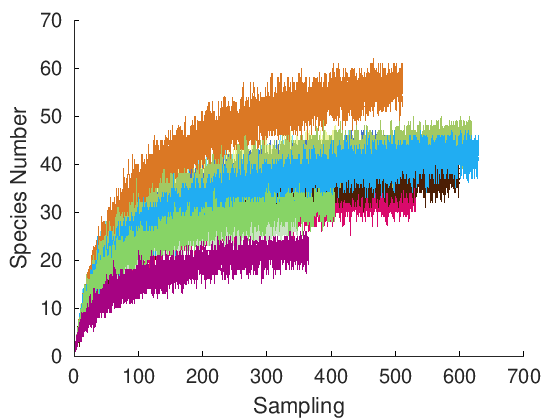

In [5]:
pkg load statistics
pkg load dataframe
pkg load symbolic

%DATA ---------------------
fid = fopen('Code/Octave/plantpollinator/Matrix complete_2020.csv');
in = fscanf(fid,'%c');
fclose(fid);
linesR = regexp(in,'(^,|)([^\n]+)', 'match');
All = char(linesR);
Forest = cell(length(All),1);
wR = unique_no_sort(linesR);

%1. Print raw data ----------------------------
R = char(wR);
%----------------------------

#categorize forest type
for k = 1:length(All);
    wHF = regexp(All(k,:),',');
    Forest(k,1) = All(k,1:wHF(1,1)-1);
end

%2. List sampled sites ----------------------------------------------
wF = unique_no_sort(Forest);
%----------------------------------------------

for n = 2:length(wF); 
TypeOutput = zeros(length(R),4);
Type = zeros(1,1);
ForestType = zeros(1,1);
xR = zeros(1,1);
wHR1 = zeros(1,1);

wF(1,n);
    cR = cellstr(wF(1,n));
    xR = regexpcell(linesR,cR);
    ForestType = cell(length(xR),1);
    
    for j = 1:length(xR);
        wHR1 = regexp(All(xR(1,j),:),',');
        ForestType(j,1) = All(xR(1,j),wHR1(1,2)+1:wHR1(1,3)-1);
        
    
        %cH = cellstr(ForestType)
        %xH = regexpcell(wF,cH)
        %ForestOutput(j,1) = xH 
         %pause
    
    end
    
%.3 Size each site -------------------------------------------
wF(1,n)
%Type = unique(ForestType)
N = length(ForestType)
wFcom(1,n) = N
%----------------------------------------------    
    
%4. Plot absolute numbers
N = zeros(1,1);
Type = unique(ForestType);N = length(ForestType);
UNI = length(Type);
red=unifrnd(0,1); green=unifrnd(0,1); blue=unifrnd(0,1);
    
  R=10;
  for rep = 1:R; 
      U = zeros(1,2);
   for r = 1:N;
       S = unidrnd(length(xR),r,1)';%100 replicates
       L = unique(ForestType(S(1,1:r)));
       U(r,1) = r;
       U(r,2) = length(L);  
   end
   hold on
   
   max(U(:,2))
   plot(U(:,1),U(:,2),'k','color',[red green blue],'Markersize',36)
  end%rep 
end
set(gca,'FontSize',20)
xlabel('Sampling','fontsize',22)
ylabel('Species Number','fontsize',22)  
    
 

ans =
{
  [1,1] = Difuntito
}

N =  479
wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406   365

MIN =  348
N =  479
ans =  44
ans =  45
ans =  44
ans =  45
ans =  45
ans =  45
ans =  45
ans =  44
ans =  45
ans =  44
ans =
{
  [1,1] = La Paja
}

N =  413
wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406   365

MIN =  348
N =  413
ans =  40
ans =  39
ans =  39
ans =  40
ans =  39
ans =  41
ans =  40
ans =  38
ans =  38
ans =  40
ans =
{
  [1,1] = Cinco cerros
}

N =  415
wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406   365

MIN =  348
N =  415
ans =  46
ans =  46
ans =  46
ans =  45
ans =  45
ans =  47
ans =  45
ans =  45
ans =  46
ans =  45
ans =
{
  [1,1] = Barrosa
}

N =  483
wFcom =

     0   479   413   415   483   511   532   599   348   619   629   406   365

MIN =  348
N =  483
ans =  43
ans =  46
ans =  43
ans =  44
ans =  43
ans =  43
ans =  44
ans =  45
ans =  45
ans =  44
ans =

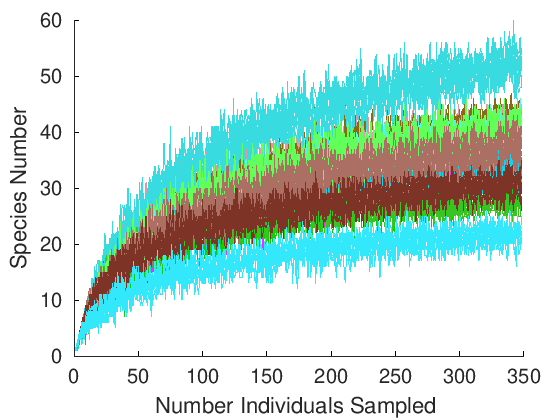

In [10]:
pkg load statistics
pkg load dataframe
pkg load symbolic

%DATA ---------------------
fid = fopen('Code/Octave/plantpollinator/Matrix complete_2020.csv');
in = fscanf(fid,'%c');
fclose(fid);
linesR = regexp(in,'(^,|)([^\n]+)', 'match');
All = char(linesR);
Forest = cell(length(All),1);
wR = unique_no_sort(linesR);

%1. Print raw data ----------------------------
R = char(wR);
%----------------------------

#categorize forest type
for k = 1:length(All);
    wHF = regexp(All(k,:),',');
    Forest(k,1) = All(k,1:wHF(1,1)-1);
end

%2. List sampled sites ----------------------------------------------
wF = unique_no_sort(Forest);
%----------------------------------------------

for n = 2:length(wF); 
TypeOutput = zeros(length(R),4);
Type = zeros(1,1);
ForestType = zeros(1,1);
xR = zeros(1,1);
wHR1 = zeros(1,1);

wF(1,n);
    cR = cellstr(wF(1,n));
    xR = regexpcell(linesR,cR);
    ForestType = cell(length(xR),1);
    
    for j = 1:length(xR);
        wHR1 = regexp(All(xR(1,j),:),',');
        ForestType(j,1) = All(xR(1,j),wHR1(1,2)+1:wHR1(1,3)-1);
        
    
        %cH = cellstr(ForestType)
        %xH = regexpcell(wF,cH)
        %ForestOutput(j,1) = xH 
         %pause
    
    end
    
%.3 Size each site -------------------------------------------
wF(1,n)
%Type = unique(ForestType)
N = length(ForestType)
wFcom(1,n) = N
%----------------------------------------------    

%4. Rarefaction ------------------------------------------
%A. Pick up more-sampled site
%B. Obtain n-subsamplings of size of less-sampled site
%C. Compare curves along subsamplings of different sizes
MIN=348
N = length(ForestType)
UNI = length(Type);
Type = unique(ForestType);
red=unifrnd(0,1); green=unifrnd(0,1); blue=unifrnd(0,1);

R=10;
for rep = 1:R; 
      U = zeros(1,2);
      for r = 1:MIN;
          S = unidrnd(length(xR),r,1)';%R replicates
          L = unique(ForestType(S(1,1:r)));
          U(r,1) = r;
          U(r,2) = length(L);  
      end
      hold on
      max(U(:,2))
      h = plot(U(:,1),U(:,2),'k','color',[red green blue],'Markersize',36);
     
end%rep 
    
end%forest
set(gca,'FontSize',20)
xlabel('Number Individuals Sampled ','fontsize',22)
ylabel('Species Number','fontsize',22)

In [ ]:
fid = fopen('Data/plantpollinator/spesamarea.csv');
in = fscanf(fid,'%c');
fclose(fid);

Name	Area	Has		Non Rar	Rar
La Paja	12	112.696	413	40	38
Difuntito	13	330.981	479	46	45
Piedra Alta	13	104.301	348	29	29
El Morro	49	0.191	365	25	25
Amarante	190	73.361	511	60	56
La Chata	229	73.637	599	40	37
La Barrosa	243	44.557	483	47	44
La Brava	396	1772.834	406	35	34
Cinco Cerros	541	28.288	415	47	45
Difuntos	1692	26.454	532	37	34
Volcan	2079	1731.828	629	46	42
Vigilancia	2147	1783.071	619	50	45

Q =

     12.00000    112.69600    413.00000     40.00000     38.00000
     13.00000    330.98100    479.00000     46.00000     45.00000
     13.00000    104.30100    348.00000     29.00000     29.00000
     49.00000      0.19100    365.00000     25.00000     25.00000
    190.00000     73.36100    511.00000     60.00000     56.00000
    229.00000     73.63700    599.00000     40.00000     37.00000
    243.00000     44.55700    483.00000     47.00000     44.00000
    396.00000   1772.83400    406.00000     35.00000     34.00000
    541.00000     28.28800    415.00000     47.00000     45.00000
   1692.00000     26.45400    532.00000     37.00000     34.00000
   2079.00000   1731.82800    629.00000     46.00000     42.00000
   2147.00000   1783.07100    619.00000     50.00000     45.00000



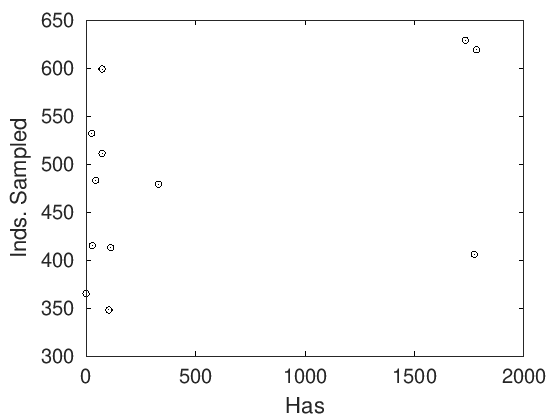

In [33]:
## Samping vs Island area

Q = [12 112.696 413 40 38
13 330.981 479 46 45
13 104.301 348 29 29
49 0.191 365 25 25
190 73.361 511 60 56
229 73.637 599 40 37
243 44.557 483 47 44
396 1772.834 406 35 34
541 28.288 415 47 45
1692 26.454 532 37 34
2079 1731.828 629 46 42
2147 1783.071 619 50 45]

plot(Q(:,2),Q(:,3),'ok')
set(gca,'FontSize',20)
xlabel('Has','fontsize',22)
ylabel('Inds. Sampled','fontsize',22)


Q =

     12.00000    112.69600    413.00000     40.00000     38.00000
     13.00000    330.98100    479.00000     46.00000     45.00000
     13.00000    104.30100    348.00000     29.00000     29.00000
     49.00000      0.19100    365.00000     25.00000     25.00000
    190.00000     73.36100    511.00000     60.00000     56.00000
    229.00000     73.63700    599.00000     40.00000     37.00000
    243.00000     44.55700    483.00000     47.00000     44.00000
    396.00000   1772.83400    406.00000     35.00000     34.00000
    541.00000     28.28800    415.00000     47.00000     45.00000
   1692.00000     26.45400    532.00000     37.00000     34.00000
   2079.00000   1731.82800    629.00000     46.00000     42.00000
   2147.00000   1783.07100    619.00000     50.00000     45.00000



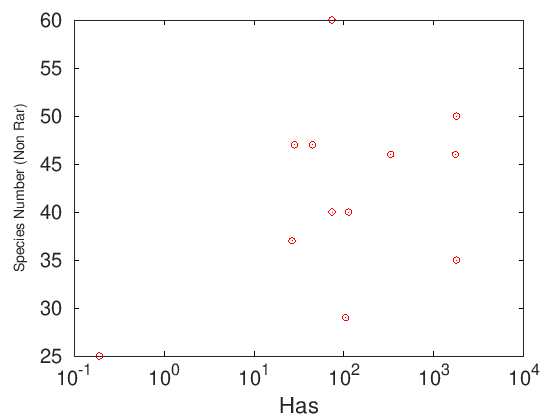

In [26]:
Q = [12 112.696 413 40 38
13 330.981 479 46 45
13 104.301 348 29 29
49 0.191 365 25 25
190 73.361 511 60 56
229 73.637 599 40 37
243 44.557 483 47 44
396 1772.834 406 35 34
541 28.288 415 47 45
1692 26.454 532 37 34
2079 1731.828 629 46 42
2147 1783.071 619 50 45]

semilogx(Q(:,2),Q(:,4),'or')
set(gca,'FontSize',20)
xlabel('Has','fontsize',22)
ylabel('Species Number (Non Rar)','fontsize',14)

Q =

     12.00000    112.69600    413.00000     40.00000     38.00000
     13.00000    330.98100    479.00000     46.00000     45.00000
     13.00000    104.30100    348.00000     29.00000     29.00000
     49.00000      0.19100    365.00000     25.00000     25.00000
    190.00000     73.36100    511.00000     60.00000     56.00000
    229.00000     73.63700    599.00000     40.00000     37.00000
    243.00000     44.55700    483.00000     47.00000     44.00000
    396.00000   1772.83400    406.00000     35.00000     34.00000
    541.00000     28.28800    415.00000     47.00000     45.00000
   1692.00000     26.45400    532.00000     37.00000     34.00000
   2079.00000   1731.82800    629.00000     46.00000     42.00000
   2147.00000   1783.07100    619.00000     50.00000     45.00000



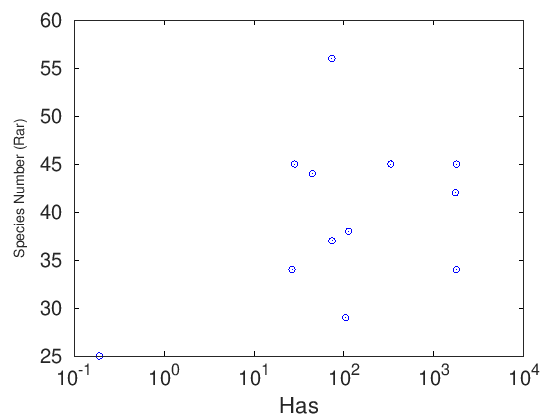

In [27]:
Q = [12 112.696 413 40 38
13 330.981 479 46 45
13 104.301 348 29 29
49 0.191 365 25 25
190 73.361 511 60 56
229 73.637 599 40 37
243 44.557 483 47 44
396 1772.834 406 35 34
541 28.288 415 47 45
1692 26.454 532 37 34
2079 1731.828 629 46 42
2147 1783.071 619 50 45]

semilogx(Q(:,2),Q(:,5),'ob')
set(gca,'FontSize',20)
xlabel('Has','fontsize',22)
ylabel('Species Number (Rar)','fontsize',14)

# Take home message

## Datasets contain samplings with different size
### Rarefaction accounts for sampling size using a variety of randomizations

# Pseudo-algorithm 
## Pick up less sampled site
## Obtain subsamplings of the size of the less sampled site
## Compare curves to decipher the statistical significance

# Questions 




## How would you account for different sampling size? 

## How would you account for time, space, and heterogeneity in the sampling design?

## How do you standarize data heterogeneity?